# PCA: Principal Component Analysis

## Goal

This method aims at finding a new base composed by the directions of highest variance for the given data. This new base will be composed by linear combinations of the initial features and thus will most certainly loose its semantic meaning.

Put it in other words, PCA is looking for the axis along which the data are the most exploded/spread.

To do so, the idea is to modelize the data by a mutlivariate normal distribution (this is a strong prior). From it, we infer a covariance matrix. When diagonalizing it, the eigen values are the variance according to the eigen vectors. Thus, the eigen vector with highest corresponding eigen value is going to be the direction of highest variance.


## Implementation steps

- normalize the data
- calculate the covariance matrix from the data
- diagonalize the latter
- find the eigen vector corresponding to the greatest eigen values

In [1]:
# to display interactive plots within the notebook
%matplotlib notebook
# to define the size of the plotted images
from pylab import rcParams
rcParams['figure.figsize'] = (10, 8)

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

from fct import generate_multivariate, normalize, plt_3d

/Users/lachaum/.pyenv/versions/p3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Generate the data

We generate random variables using a mulitvariate gaussian distribution. This correspond to the perfect case (the data actually follow a multivariate normal).

<IPython.core.display.Javascript object>


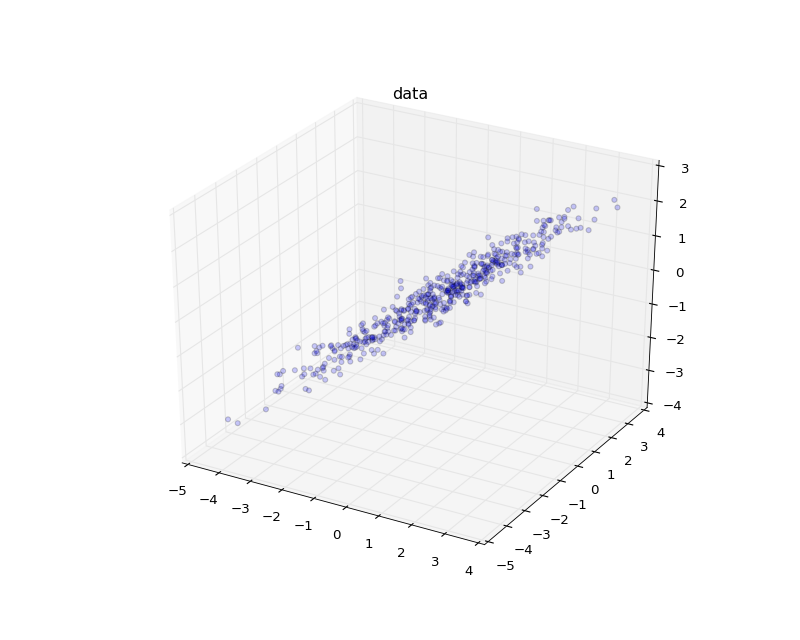

In [2]:
data = generate_multivariate(size=500, dimension=3)
plt_3d(data)

## Calculate the covariance matrix and get the eigen values/vectors

RQ: It is interesting to note that the obtained covariance matrix (cov in the code) is not necessarily the same as the one used to generate the data.

In [3]:
# build the covariance matrix from the randomly generated data
cov = np.cov(data.T)

# get its eigen values and vectors
eigenvalues, eigenvectors = np.linalg.eig(cov)

# sorting the eigenvalues
idx = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

## Plot the eigen vectors on the data

This part is not dimension agnostic, if you change the dimension when generating the data, you will need to change this part of the code.

<IPython.core.display.Javascript object>


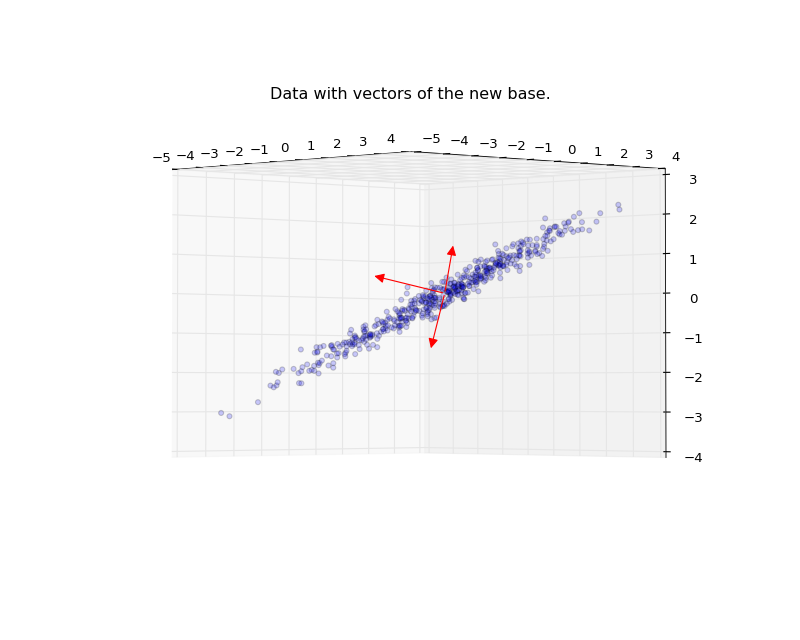

In [4]:
class Arrow3D(FancyArrowPatch):
    """Code obtained from: """
    
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]), (xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

        
fig = plt.figure()
# RQ: gca = get current axis
ax = fig.gca(projection='3d')
data_t = data.T
ax.scatter(data_t[0], data_t[1], data_t[2], alpha=0.2)
plt.title('Data with vectors of the new base.')

nb_eigen_vector_to_show = -1
for vector in eigenvectors:
    # vectors are made bigger to better visualize them
    vector_plt = 2 * vector
    a = Arrow3D([0, vector_plt[0]],[0, vector_plt[1]],[0, vector_plt[2]], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
    ax.add_artist(a)

In [5]:
# The new vectors might not seem orthogonal so here is a proof.
# Note that sometimes, as computers tend to have issues with
# floating numbers, you might not get 0.0 but a very very
# small number (10^-16 for instance).
v1, v2, v3 = eigenvectors

print(sum(v1 * v2))
print(sum(v1 * v3))
print(sum(v2 * v3))

1.97064586871e-15
-1.22124532709e-15
-8.32667268469e-16
